#  **Esame di Tecniche di Rappresentazione e Modelizzazione dati**

## *Analisi della distribuzione di miscentering di ammassi eRosita*

Nel seguente elaborato si propone di leggere e analizzare dati provenienti da un'importante missione astronomica, la survey **eROSITA** (extended ROentgen Survey with an Imaging Telescope Array), finalizzata alla mappatura dell'intero cielo nell'alta energia dei raggi X.
La prima pubblicazione di dati nel febbraio 2024, fornisce una catalogo dettagliato *"catalog_selected_columns_filtered_with_cluster_index.csv"* che include informazioni chiave come il redshift (*BEST_Z*), la massa (*LogM500* - espressa come logaritmo della massa dell’ammasso di galassie in unità di massa solare ($M_{o}$)), e la distanza normalizzata (*BCG_offset_R500*) tra il centro osservato in banda X (che traccia il gas caldo dell’ammasso di galassie) e quello in banda ottica (che traccia la popolazione di galassie contenute). 

La calibrazione della miscentering distribution, ovvero la distribuzione degli offset tra i centri degli ammassi di galassie tracciati dalla componente collisionale (gas) e dalla componente non collisionale (galassie), è essenziale per migliorare l'accuratezza delle 
misure cosmologiche derivanti dagli studi degli ammassi di galassi. Questi offset 
possono influenzare significativamente la stima della massa degli ammassi alternando le  inferenze cosmologiche ottenute dalla loro distribuzidne de evoluzione nel tempo.

Il focus dell'analisi verterà sullo studio della distribuzione delle distanze normalizzate (BCG_offset_R500) in relazione alla massa (LogM500) e al redshift (BEST_Z) degli ammassi, e sulla creazione di modelli predittivi basati su parametri $\rho$, $\sigma_{0}$ e $\sigma_{1}$.

Il procedimento di analisi si articola nei seguenti punti: 
- si prendono le misurazioni di distanza normalizzate, di massa e  di redshift
- si graficano i dati per valutare la distribuzione distanze normalizzate (*BCG_offset_R500*) e la sua variazione in funzione di massa e redshift.
- si implentano i due modelli teorici proposti che dipendono da dei parametri, e si analizza come variano al variare di quest'ultimi
- si utilizza l'algoritmo **ECMEE** per fittare i parametri dei due modelli 
- si confrontano i due modelli teorici, analizzando l'incertezza associata al modello
- si cerca di capire quali sono le migliori stime per valori di $\rho$, $\sigma_{0}$ e $\sigma_{1}$
- capire con quale incertezza vengono stimati e valutare la bontà del fit (Test del $\chi^2$)

### Lettura dei dati

Innanzitutto si carica il file e si leggono le tre colonne d'interesse.

In [3]:
#Librerie 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
%matplotlib inline 
# consente di visualizzare i grafici all'interno del notebook
# Si carica il file csv e si leggono le colonne "BEST_Z","BCG_offset_R500", "logM500"
df = pd.read_csv("catalog_selected_columns_filtered_with_cluster_index.csv", usecols = ["BEST_Z","BCG_offset_R500", "logM500"])
df.describe() # restituisce un'analisi statistica delle colonne 

,BEST_Z,BCG_offset_R500,logM500
count,7567.000000,7567.000000,7567.000000
mean,0.331353,0.317392,14.314848
std,0.196929,0.439892,0.309311
min,0.050020,0.000831,12.740363
25%,0.181605,0.048115,14.136721
50%,0.295710,0.121174,14.330819
75%,0.438330,0.399448,14.516469
max,1.141850,4.498073,15.208898


### Grafici dei dati

Come primo step si esamina la distribuzione di distanze normalizzate (*BCG_offset_R500*) e la sua variazione in funzione di massa e di redshift.

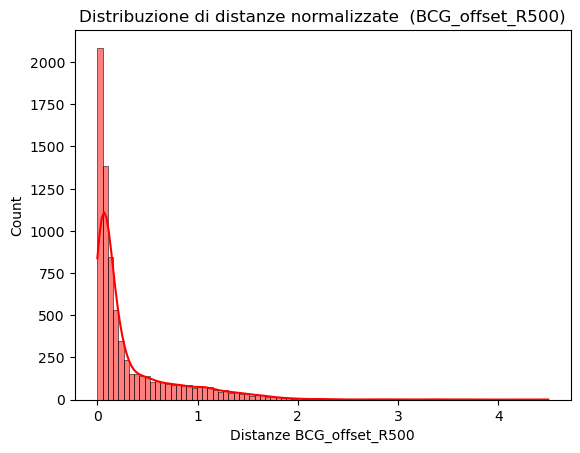

In [5]:
import seaborn as sns #importare la libreria seaborn per fare il grafico 
offset = df['BCG_offset_R500'] 
sns.histplot(offset, bins=86, kde= True, color='red')  #kde true serve per avere la curva di densità, 7567 dati i bin=sqrt(7567)
plt.xlabel('Distanze BCG_offset_R500')
plt.title("Distribuzione di distanze normalizzate  (BCG_offset_R500)") # plotta i conteggi 
plt.show()

*Perchè istogrammarli?* 

La scelta è dovuta al fatto che l'interesse è volto a capire quale sia la distribuzione dei dati raccolti (ad esempio se seguono una distribuzione normale,uniforme..) e quale sia la concentrazione di dati e la loro dispersione. Ottimo metodo di valutazione per quando si hanno molti dati e non si conosce la loro distribuzione a priori. Da una prima analisi <u>qualitativa</u> si nota come la maggior parte dei valori delle distanze siano concentrati tra 0 e 2 (difatti in questo range di intervallini ricadono più valori), e poi sembrano decadere esponenzialmente fino un valore massimo circa pari a 5. Il fatto che la maggior parte di valori è inferiore a 2 potrebbe suggerire che per la maggior parte  degli ammassi la distanza normalizzata BCG misurata sia vicina al centro potenziale gravitazionale di essi.

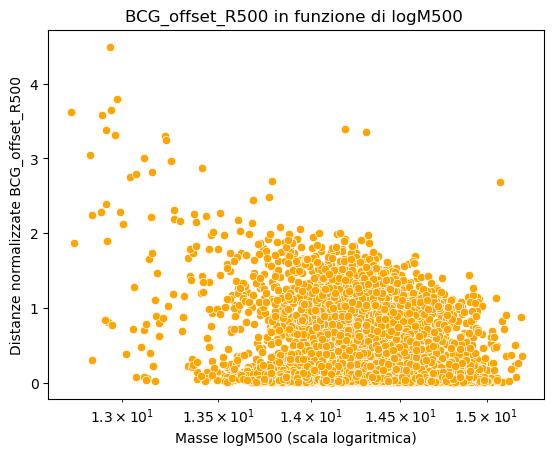

In [8]:
#Grafico delle distanze in funzione delle masse
sns.scatterplot(x= 'logM500', y='BCG_offset_R500', data=df, color = 'orange') #utilizza un grafico a dispersione 
plt.xlabel('Masse logM500 (scala logaritmica)')
plt.ylabel('Distanze normalizzate BCG_offset_R500')
plt.title("BCG_offset_R500 in funzione di logM500 ")
plt.xscale('log') #scala logaritmica 
#plt.show()
plt.savefig("grafico2.png", dpi=600)

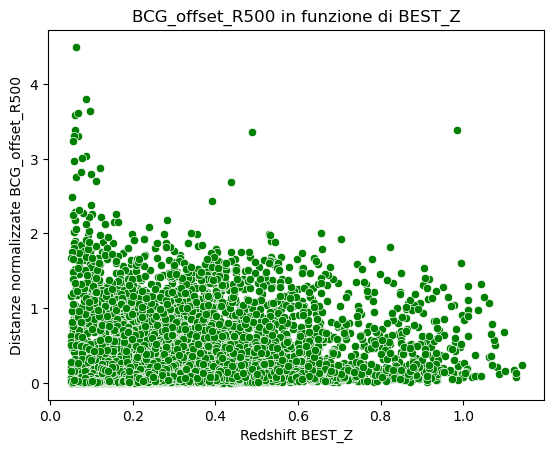

In [10]:
#Grafico delle distanze in funzione del redshift
import matplotlib
sns.scatterplot(x= 'BEST_Z', y='BCG_offset_R500', data=df, color = 'green') #utilizza un grafico a dispersione 
plt.xlabel('Redshift BEST_Z')
plt.ylabel('Distanze normalizzate BCG_offset_R500')
plt.title("BCG_offset_R500 in funzione di BEST_Z")
#plt.show()
plt.savefig("grafico.png", dpi=600)

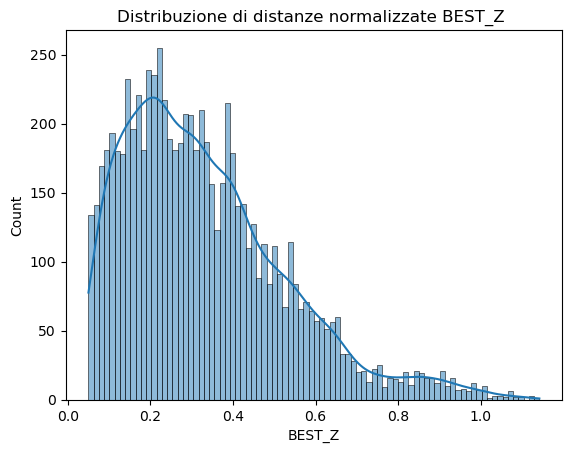

In [12]:
offset = df['BEST_Z'] 
sns.histplot(offset, bins=86, kde= True)  #kde true serve per avere la curva di densità, 7567 dati i bin=sqrt(7567)
plt.xlabel('BEST_Z')
plt.title(" BEST_Z ") # plotta i conteggi 
plt.show()

Interessante è osservare la distribuzione del redshift *(BEST_Z)*, come fatto nell'ultimo grafico. 
*Cosa si può dire osservando i grafici?*

Dal grafico *"BCG_offset_R500 in funzione di BEST_Z"* si nota come a bassi valori di redshift vi è una maggiore dispersione di BCG, con alcuni valori più alti, mentre più aumenta il redshift più rari sono i valori di BCG (come d'altronde si osserva dalla distribuzione istogrammata sia dei BCG che dei BEST_Z). 

Mentre per nel grafico *"BCG_offset_R500 in funzione di logM500"* si nota che gli ammassi più massicci sono più centrati, i valori degli offset diminuiscono, anche se la loro distribuzione è più concentrata, mentre per gli ammassi meno massicci la dispersione degli offset è maggiore, e anche i loro valori. 

I motivi dei risultati grafici possono essere diversi, per esempio:
- **Distribuzione spaziale della massa**: gli ammassi più massicci sono meno soggetti a perturbazioni e hanno una distribuzione più concentrata di massa al loro centro rispetto agli ammassi meno massicci
- **Distribuzione del redshift**: per gli ammassi a basso redshift sembra che le BCG siano meno allineate con il centro del gas
- può dipendere dal metodo di campionamento (la quantità di dati che sono stati raccolti).

### I due modelli

Come anticipato, dopo aver graficato ed esaminato la parte dei contenuti del file utili per l'analisi, si possono sviluppare dei modelli per predire la distribuzione osservata della distanza normalizzata 'x' tra il centro determinato in banda X ed il centro determinato in banda ottica. In particolare si considerano i seguenti due modelli dove una frazione $\rho$ di ammassi ben centrati viene descritta dal parametro $\sigma_{0}$ ed una frazione 1-$\rho$ di ammassi centrati erroneamente viene descritta dal parametro $\sigma_{1}$.

I due modelli sono i seguenti:

#### Modello S15 (Saro et al.2015)
P(x|$\rho$,$\sigma_{0}$,$\sigma_{1}$)=$\rho \cdot \frac{x}{\sigma_{0}^2} \cdot e^{(-0.5 \cdot (\frac{x}{\sigma_{0}})^2)}+(1-\rho) \cdot \frac{x}{\sigma_{1}^2}\cdot e^{(-0.5\cdot (\frac{x}{\sigma_{1}})^2)}$

#### Modello Z19 (Zhang et al.2019)
P(x|$\rho$,$\sigma_{0}$,$\sigma_{1}$)=$\rho \cdot \frac{1}{\sigma_{0}} \cdot e^{(-\frac{x}{\sigma_{0}})}+(1-\rho) \cdot \frac{x}{\sigma_{1}^2}\cdot e^{( -\frac{x}{\sigma_{1}})}$

quindi si implementano le due funzioni e si comparano i dati per alcuni valori dei parametri, tenendo presente la distribuzione delle distanze normalizzate, l'istogramma ad inizio codice. 


Di seguito, prima di introdurre il codice, si presenta brevemente in cosa consiste l'analisi statistica utilizzata e l'algoritmo utilizzato, specificando gli aspetti principali e il funzionamento dell'implementazione. 

## Analisi bayesiana 

In questa trattazione viene utilizzata la statistica Bayesiana (utilizza molto in astrofisica), implementata poi praticamente grazie all'algoritmo EMCEE. 

L'inferenza bayesiana è un metodo statistico che di basa sull'equazione di Bayes, derivata dal concetto fondamentale di probabilità condizionata, e si differenzia dall'inferenza frequentista per il modo con cui calcola la probabilità e aggiorna le credenze.
|Bayesiana |Frequentista|
|----------|------------|
|Fornisce una probabilità al modello. | Non fornisce una probabilità al modello, testa solo le ipotesi. |
|Dipende dalla Prior e dalla Likelihood. | Dipende solo dalla Likelihood, non include la Prior o ipotesi sui parametri da stimare, ma solo i dati|


### Probabilità condizionata 
La probabilità condizionata di un evento $A$ dato un altro evento $B$ (con $P(B) > 0$) è definita come:
$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$
Questa espressione descrive la probabilità che l'evento $A$ si verifichi, sapendo che l'evento $B$ si è già verificato.
Allo stesso modo si scrive la probabilità condizionata di $B$ dato $A$:
$$P(B|A) = \frac{P(A \cap B)}{P(A)}$$
Dato che $P(A \cap B)$=$P(B \cap A)$ si può scrivere
$$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
$$
da cui si deriva l'equazione di Bayes.

### Interpretazione
L'equazione di Bayes permette di aggiornare la probabilità di un evento A in base alla presenza di un nuovo evento B. In altre parole, fornisce un modo per aggiornare le credenze iniziali (probabilità a priori) in base a nuove informazioni o evidenze.

Se sostituiamo $A$ con i parametri $p$ di un modello M e $B$ con i dati osservati $d$, si prò scrivere l'equazione seguente:
$$P(p|dM)=\frac{P(d|pM)\cdot P(p|M)}{P(d|M)}$$
dove $P(p|dM)$ è la *Posterior*, $P(d|pM)$ è la *likelihood* mentre $P(p|M)$ è la *prior*.

In altre parole, si parte da una credenza iniziale (prior) e la si aggiorna con i nuovi dati (likelihood) e si ottiene una nuova stima (posterior).

## Algoritmo EMCEE

L'algoritmo `emcee` è un'implementazione efficiente del campionamento Markov Chain Monte Carlo (MCMC) progettatto specificamente per l'analisi bayesiana. L'algoritmo è frequentemente utilizzato in astrofisica per l'ottimizzazione e l'inferenza statistica.

### Caratteristiche

Utilizza un metodo "ensemble sampling" per l'efficienza del campionamento.

Funziona tramite un processo iterattivo in cui la stima dei parametri viene migliorata ad ogni ciclo, basandosi su i 'walkers', ovvero dei camminatori che esplorano lo spazio dei parametri in maniera casuale, pur sempre mantenendo una dipendenza tra di essi, per evitare di intrappolarsi in minimi locali. Risulta particolarmente efficiente per spazi multidimensionali.

### Punti chiave

- Si definisce il numero di **walkers** e la loro posizione iniziale, la dimensione del parametro da campionare, il numero di passi e la funzione di probabilità da campionare
- l'algoritmo costruisce una distribuzione del **Posterior**, aggiornando le posizioni dei walkers che esplorano lo spazio dei parametri
- infine dopo un periodo di burn-in i walkers si stabilizzano permettendo di raggiungere una distribuzione stazionaria.

Per una buona riuscita dell'algoritmo è importante tenere conto di alcuni aspetti come: 
- la scelta del modello il quale deve essere più o meno coerente con i dati, in modo tale da non rendere troppo difficoltosa la convergenza
- la buona scelta del Prior e la qualità dei dati (normalizzati) 
- il numero di walker, i quali non devono accelerare troppo la convergenza o eventualmente rallentarla 
- lo step size, esso non deve essere né troppo grande né eccessivamente piccolo, per evitare che nel primo caso vengano rifiutati troppi campioni o nel secondo caso di focalizzarsi solo in una zona senza esplorare il resto dello spazio dei parametri
- il burn-in deve riuscire a togliere i dati iniziali prima che i camminatori raggiungano la convergenza, per evitare di alterare le stime finali
- il thining, per sottocampionare e prendere solo alcuni campioni da quelli prodotti durante il campionamento per ridurre la correlazione tra parametri e la dimensione dei dati a disposizione

Nella pratica poi verranno implementate la distribuzione del *likelihood* e la distribuzione del *prior*, il quale può derivare da supposizioni inziali o da modelli teorici, come in questo caso; quindi si calcola la distribuzione del *Posterior* come prodotto tra *likelihood* e *prior* (vedi eq. bayesiana).
I modelli teorici dipendono dai parametri, quindi si vuole vedere quali parametri fittano meglio i dati a disposizione e con quale incertezza.

#### Funzione likelihood 

Se $P(x_{i}|\theta)$ è la  funzione di distribuzione dei dati, funzione log-likelihood può essere scritta: 
$$L(\theta)=\sum_{i}ln P(x_{i}|\theta)$$
dove per il primo modelloS15
$$ln(P(x_{i}|\theta))=ln \biggl ( \rho \cdot \frac{x_{i}}{\sigma_{0}^2} \cdot e^{(-0.5 \cdot (\frac{x_{i}}{\sigma_{0}})^2)}+(1-\rho) \cdot \frac{x_{i}}{\sigma_{1}^2}\cdot e^{(-0.5\cdot (\frac{x_{i}}{\sigma_{1}})^2)}\biggl)$$
e per il secondo modelloS19
$$ln(P(x_{i}|\theta))=ln \biggl( \rho \cdot \frac{1}{\sigma_{0}} \cdot e^{(-\frac{x_{i}}{\sigma_{0}})}+(1-\rho) \cdot \frac{x_{i}}{\sigma_{1}^2}\cdot e^{( -\frac{x_{i}}{\sigma_{1}})} \biggl)$$

#### Funzione Prior 

La prior quantifica cosa si conosce sui parametri prima di iniziare l'implementazione, deve modellare le credenze iniziali sui parametri. In generale si usa una prior uniforme.

Nello specifico si sono poste le seguenti condizioni sui parametri: 
$$0\leq\rho\leq1$$
$$\sigma_{0}>0$$
$$\sigma_{1}>0$$

Per semplicità si riporta prima il codice e l'analisi svolta per il Modello S15 (Saro et al.2015) e poi per il Modello Z19 (Zhang et al.2019).

## ModelloS15

#### Comparare i dati con il modello per alcuni esempi

Successivamente (nel codice riportato) si analizza come variano queste funzioni al variare dei parametri, sovrapponendo l'istogramma con la distribuzione delle distanze. 

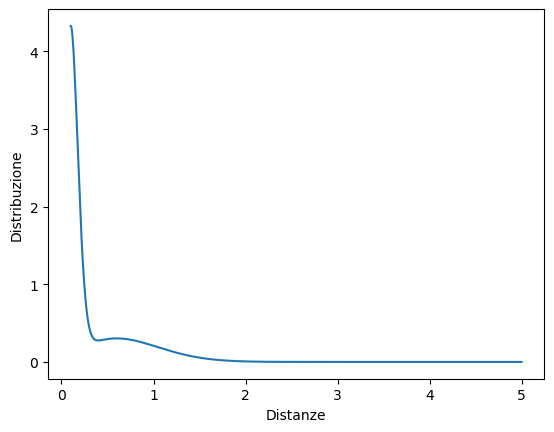

In [24]:
#modello S15, si definisce la funzione di distribuzione del modello 
# inizializzare i parametri 
rho = 0.7
sigma0 = 0.1
sigma1 = 0.6
def modello1 (x, rho, sigma0, sigma1): 
    return (rho*(x/(sigma0**2)))*(np.exp(-0.5*(x**2)/(sigma0**2)))+((1-rho)*(x/(sigma1**2)))*(np.exp(-0.5*(x**2)/(sigma1**2)))
#0.8,0.1,0.05
#creare un array di valori x 
x_val = np.linspace(0.1,5,1000)
# modello
y_val = modello1(x_val, rho, sigma0, sigma1)
#plottare la funzione di distribuzione 
plt.plot(x_val, y_val, label = 'ModelloS15')
plt.xlabel('Distanze')
plt.ylabel('Distribuzione')
plt.show()

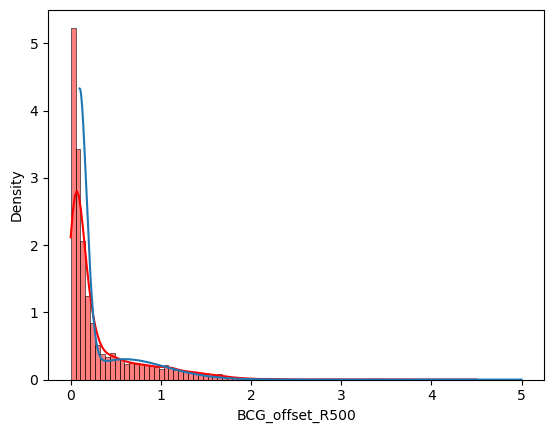

In [26]:
#Grafico con distribuzione dei dati e fit del modello con parametri iniziali
offset = df["BCG_offset_R500"]
sns.histplot(offset, bins=83, kde=True, color='red', stat='density')
plt.plot(x_val, y_val, label = 'modello1')

Di seguito viene implementato l'algoritmo ECMEE per il primo modello. 

In [28]:
# Si definisce la funzione Likelihood
def log_likelihood(theta, x_val):
     rho, sigma0, sigma1 = theta 
     model = modello1(x_val, rho, sigma0, sigma1)
     return np.sum(np.log(model))


In [30]:
# Si definisce la funzione Prior 
def log_prior(theta):
    rho, sigma0, sigma1 = theta
    if not (0 <= rho <= 1 and sigma0 > 0 and sigma1 > 0):
        return -np.inf  # per parametri non validi
    
    return 0.0  # Prior uniforme


In [32]:
# Si definisce la funzione Posterior
def log_posterior(theta, x_val):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x_val) 

Importando la funzione *minimize* si può calcolare una stima iniziale dei parametri, massimizzando la funzione log_posterior.
Eventualmente si può decidere di far partire l'algoritmo dalla stima iniziale tramite *minimize* oppure dall'array theta definita più avanti. 

Far partire la posizione con le stime iniziali dei parametri ottenute tramite il *minimize* farà convergere più velocemente i walkers. 

In [35]:
from scipy.optimize import minimize # trova il minimo di una funzione
X = df["BCG_offset_R500"]
nll = lambda *args: -log_posterior(*args) # minimizzare il -log_post equivale a massimizzare la log_post

# Parametri iniziali per l'ottimizzazione
initial = np.array([0.8, 0.3, 0.5]) * (1 + 0.1 * np.random.randn(3))  # piccole fluttuazioni ai parametri iniziali 

# Minimizzazione usando scipy.optimize.minimize
soln = minimize(nll, initial, args=(X))

# Parametri ottimizzati
rho_bf, sigma0_bf, sigma1_bf = soln.x
print(soln.x)

[0.62825884 0.06699864 0.62301053]


C:\Users\Sara\anaconda3\Lib\site-packages\scipy\optimize\_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\Sara\anaconda3\Lib\site-packages\scipy\optimize\_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


S'importa la libreria **EMCEE**

In [37]:
import emcee
import time

In [39]:
#Si testa la funzione della posterior per alcuni valori dei parametri 
#più è grande la differenza tra le posterior calcolate più il modello è sensibile alla variazione dei parametri
theta = np.array([0.6, 0.9, 0.5]) #parametri iniziali

%time print(log_posterior(theta, x_val))
%time print(log_likelihood(theta, x_val))

theta = np.array([0.3, 0.4, 0.2])

%time print(log_posterior(theta, x_val))

-4678.505443490638
CPU times: total: 0 ns
Wall time: 2 ms
-4678.505443490638
CPU times: total: 15.6 ms
Wall time: 1.47 ms
-25127.02368535906
CPU times: total: 0 ns
Wall time: 0 ns


In [53]:
offset = df["BCG_offset_R500"].values
ndim=3 #il numero di parametri da stimare 
nwalkers=12 # il numero di walkers ndim*2+1
print(theta)
pos = theta + 0.01 * np.random.randn(nwalkers, ndim) # si definisce la posizione iniziale 
#Algoritmo di EMCEE
sampler_1 = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args= [offset]) # creare il sampler

sampler_1.run_mcmc(pos, 3000, progress=True); #posizione, nstep, avvia il campionamento

[0.3 0.4 0.2]


100%|█████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:13<00:00, 225.47it/s]


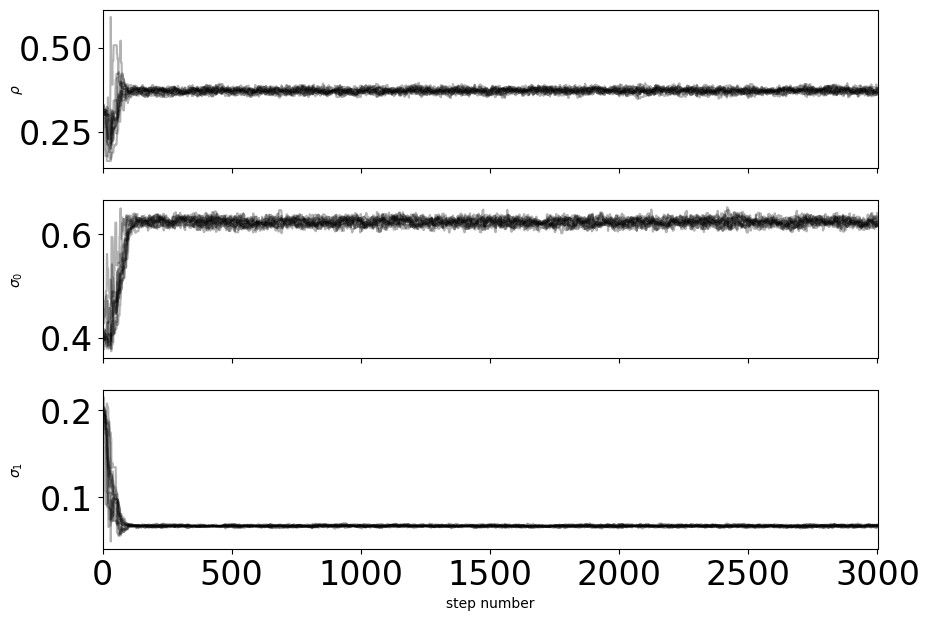

In [55]:
samples_1 = sampler_1.get_chain()
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
labels = [r"$\rho$", r"$\sigma_{0}$", r"$\sigma_{1}$"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples_1[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples_1))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [ ]:
tau = sampler_1.get_autocorr_time() #per vedere a quali passi cominciano ad autocorrelarsi i parametri
print(tau)

In [57]:
# S'importa la libreria getdist
import getdist
from getdist import plots, MCSamples

(16200, 3)
Removed no burn in


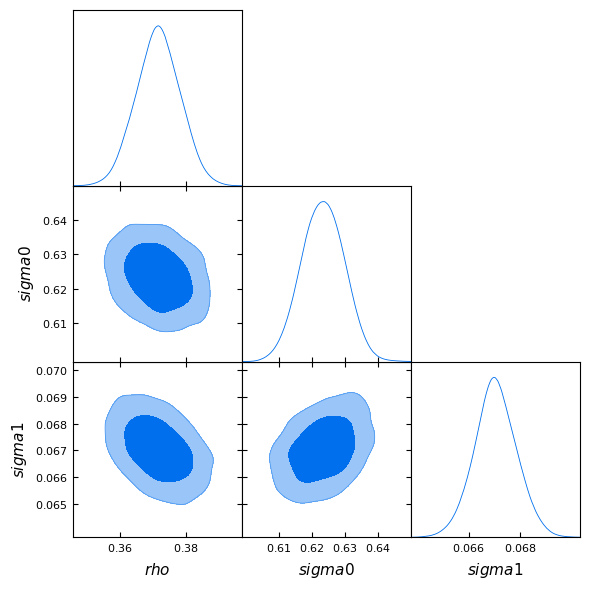

In [59]:
emcee_sample_1 = sampler_1.get_chain(discard=300, thin=2, flat=True) # rimuove il burn-in e appiattisce la catena
#thining sottocampiona, prendendo un campione ogni due passi, per ridurre la correlazione tra i parametri
print(emcee_sample_1.shape) # risulta una matrice la cui dimensione delle righe sono il numero di campioni dopo il burn-in
#ogni colonna corrisponde a una parametro specifico quindi in questo caso dovrebbero essere 3

labels=["rho","sigma0","sigma1"]
names=["rho","s0","s1"]

samples_1 = MCSamples(samples=emcee_sample_1,names = names, labels = labels)
#emcee_sample_1 sono i campioni ottenuti dalla MCMC appiatti e scartati dal burn-in 
#Triangle plot
g = plots.getSubplotPlotter() 
# Mostra la distribuzione marginale per ogni parametro ed le elissi 
matplotlib.rc('xtick',labelsize=24)
matplotlib.rc('ytick',labelsize=24)

g.triangle_plot(samples_1, filled=True)

Per avere una rappresentazione visiva della correlazione tra i parametri, si possono osservare le ellissi di confidenza tra due parametri alla volta. 
Le ellissi hanno zone più scure che rappresentano la maggiore densità di probabilità di trovare i parametri stimati. 
Inoltre dall'inclinazione dell'ellisse si può determinare il tipo di correlazione:
- se le ellissi appaiono strette e allungate, significa che i parametri sono correlati
- se l'inclianzione è positiva sono correlati positivamente (all'aumentare di un parametro aumenta anche l'altro), altrimenti se hanno inclinazione negativa si dicono anti-correlati  (all'aumentare di un parametro diminuisce l'altro)
- se le ellissi appaiono più tonde e meno inclinate suggeriscono una bassa correlazione tra i parametri



### Valori di Best-fit

A questo punto i valori significativi che si vogliono ottenere dall'implementazione per i parametri sono il valor medio, il best-fit e l'incertezza associata ai parametri. 
Il valor medio del parametro corrisponde al picco delle ditribuzioni (essendo abbastanze simmetriche), mentre il best-fit è il valore all'interno della catene che massimizza la probabilità di trovare le miglior stima dei parametri. 


In [64]:
# Inizializzare gli array 
means=np.zeros(ndim) 
best_fits=np.zeros(ndim)

log_like= sampler_1.get_log_prob(discard=300, thin=2, flat=True) 
# salva i valori della log-like per ogni campione della catena dopo aver tolto i primi 300  

for i in range(len(names)):
    print(samples_1.getInlineLatex(names[i],limit=1)) 
    stats  =samples_1.getMargeStats() # calcola le statistiche marginali su ciascun parametro 
    means[i] = stats.parWithName(names[i]).mean # si estrare la media 
    best_fits[i]=emcee_sample_1[np.argwhere(log_like==np.amax(log_like)),i]
    # si cerca l'indice che corrisponde al valore che massimizza la log-like, valore che corrisponde al best-fit
    print(labels[i],'best fit =',best_fits[i])  # si printano i risultati

rho = 0.3717\pm 0.0067
rho best fit = 0.3715973460918254
sigma0 = 0.6234\pm 0.0065
sigma0 best fit = 0.6229799037115282
sigma1 = 0.06704\pm 0.00083
sigma1 best fit = 0.06698098604571852


C:\Users\Sara\AppData\Local\Temp\ipykernel_16248\2921026926.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  best_fits[i]=emcee_sample_1[np.argwhere(log_like==np.amax(log_like)),i]


Si vede che i valori di media e best-fit non coincidono esattamente. 

## Bontà del fit

Come ultimo step si valuta la bontà del fit, ovvero si valuta quanto il modello, calcolato con i parametri ottimizzati, approssima bene i dati.

- **Confrontare i dati con la media e il best-fit** per valutare l'accuratezza della rappresentazione del modello rispetto ai dati reali
- **Confrontare i dati con un campione di modelli estratti dalla catena** per analizzare la variabilità e la distribuzione delle previsioni del modello 
- **Calcolare il best-fit** $\chi^2$ per determinare il miglior adattamento del modello ai dati

Text(0, 0.5, 'Residui')

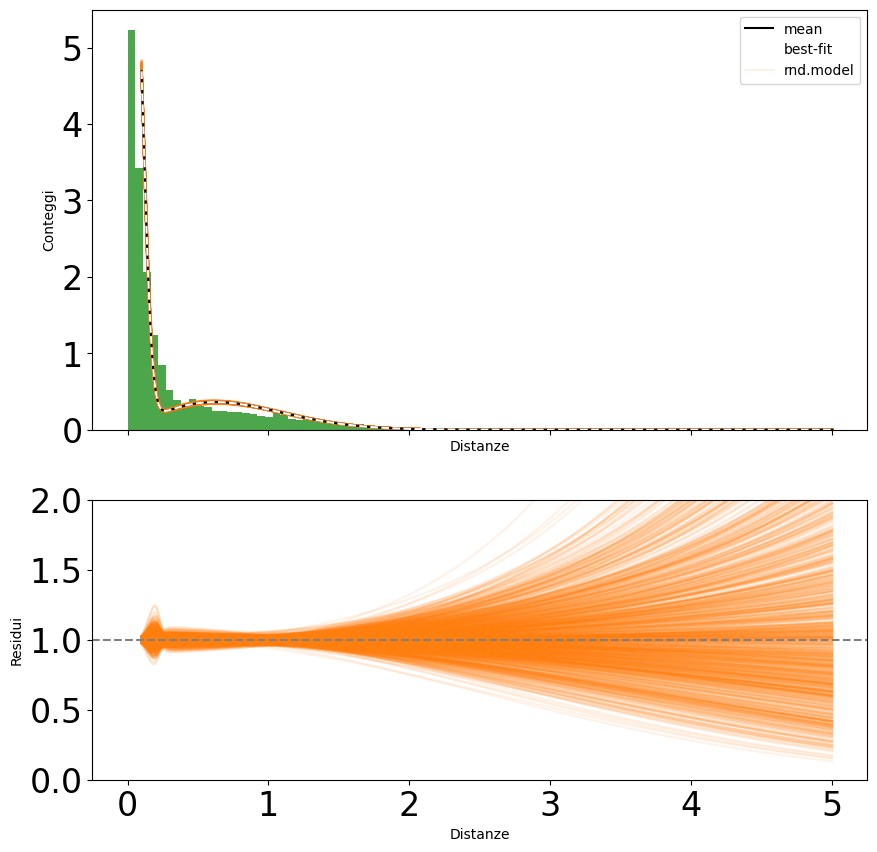

In [70]:
x = np.linspace(0.1, 5,1000)

fig, ax = plt.subplots(2, figsize=(10, 10), sharex=True,gridspec_kw = {'height_ratios':[3,2]}) # si creano due figure 
ax[0].hist(df['BCG_offset_R500'], bins=83, color='green', alpha=0.7, density = True) #si plotta l'istogramma dei dati

# Mean model 
rho, sigma0, sigma1 = means # si prendono i valori medi dei parametri calcolati in precedenza 
y_val_giust = modello1(x, rho, sigma0, sigma1) # si ricalcola il modello 
ax[0].plot(x, y_val_giust, c="k",zorder=10,label='mean')

# Best-fit model
rho, sigma0, sigma1 = best_fits # si prendono i valori best_fits calcolati in precedenza 
y_val_giust = modello1(x, rho, sigma0, sigma1) # si ricalcola il modello 
ax[0].plot(x, y_val_giust, c="w",ls='--',zorder=11,label='best-fit')

# Si estraggono N=1000 campioni dalla catena e si tracciano rispetto ai dati
N=1000 
inds = np.random.randint(len(emcee_sample_1), size=N) # si definiscono gli indici casuali da campionare 
for ind in inds: #fai un loop 
    rho, sigma0, sigma1 = emcee_sample_1[ind] # si definiscono un valore per rho, sigma0 e sigma1
    y_val = modello1(x, rho, sigma0, sigma1)
    if ind==inds[0]:
        ax[0].plot(x, y_val, "C1", alpha=0.1, label='rnd.model') # modelli casuali
    else:
         ax[0].plot(x, y_val, "C1", alpha=0.1)
    ax[1].plot(x, y_val/y_val_giust, "C1", alpha=0.1) #residui modello campionato-modello medio, il rapporto deve essere circa 1


ax[0].set_xlabel('Distanze')
ax[0].set_ylabel('Conteggi')
ax[0].legend()

ax[1].set_ylim(0,2)
ax[1].set_xlabel('Distanze')
ax[1].axhline(1.,ls='--',c='gray')
ax[1].set_ylabel('Residui')





Quello che stato fatto è estrarre 1000 campioni casuali dalla catena MCMC salvata in emcee_sample_1.

Per ciascun campione, si calcola il modelloS15. 

Ogni linea arancione rappresenta un possibile modello estratto dalla distribuzione a posteriori.
Il parametro alpha=0.1 rende le curve trasparenti, creando una zona di densità che rileva l'incertezza sulle previsioni del modello. Maggiore è la dispersione delle linee, maggiore è l'incertezza nel modello, difatti per determinare se sia un buon fit i residui non devono allontanarsi significativamente da 1. 

Dal grafico si nota che nella coda i residui si discostano maggirmente da 1, probabilmente perchè nella coda i dati e i valori che prevede il modello diventano più piccoli e più rari, e quindi aumenta l'incertezza, dovuta alla maggiore imprecisione del modello in quelle zone. 

### Test di ipotesi

Per verificare l'adattamento ai dati del modello, si esegue il test di Pearson per i valori *BCG_offset_R500* in circa 80 intervalli e si calcola la statistica di test come:
$$t=\sum_{j=1}^{m}=\frac{(n_{j}-\mu_{j})^2}{\mu_{j}}$$
con 
$$\mu_{j}=E[n_{j}]=np_{j}$$
la probabilità è definita come
$$p\simeq P(x_{j}^*,par)\Delta_{j}$$
con $\Delta_{j}$ dimensione dell'intervallino e $par$ i parametri.
Quindi si esegue il test sulle $n_{j}$, ovvero numero di eventi per ogni intervallo, si fissa $\mu_{j}>20$. 


gradi= 26
gradi= 26
Chi_sq best-fit = 1694.56
critical value (alpha=0.05): 38.885138659830055
Reduced Chi_sq best-fit = 65.18


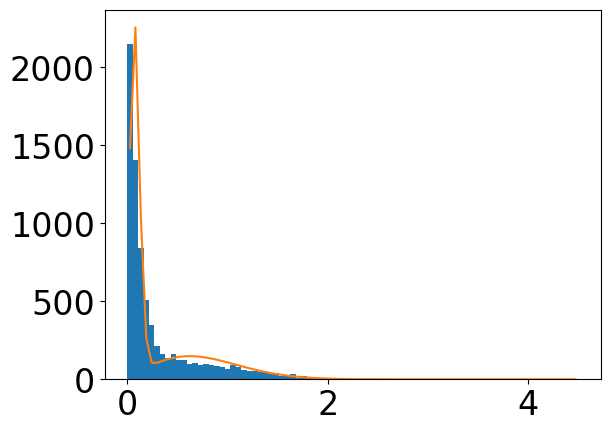

In [73]:
#Si esegue il test di Pearson
from scipy.stats import chi2
n_bins = 83 #numero di bin
x_values= df['BCG_offset_R500'] 
y,x,_=plt.hist(x_values, bins=n_bins) #istogramma dei valori 
xcentro=(x[1:]+x[:-1])/2 #centro dei bin
dx=x[1:]-x[:-1] #l'ampiezza del bin 
# si definisce il test
def testipotesi(y,x,par):
    rho, sigma0, sigma1 = par
    model = modello1(xcentro, rho, sigma0, sigma1)*dx # densità di probabilità, ovvero distribuzione moltiplicata per l'ampiezza del bin 
    mu = len(x_values)*model # numero di eventi che ci si aspetta per ogni bin 
    filtro = mu > 20 #prendere i bin con i valori di aspettazione maggiore di 20 
    s = np.sum(((y - mu)**2/mu)[filtro])  # il chi quadro
    gradi = len(mu[filtro]) - 4 #1 di default + i tre parametri
    print('gradi=',gradi)
    return s,mu 
    
s,mu = testipotesi(y,xcentro,best_fits) 
filtro = mu > 20
gradi = len(mu[filtro]) - 4  
plt.plot(xcentro, mu)
print('gradi=',gradi)
reduced_chisq=s/gradi #chi quadro ridotto 
print('Chi_sq best-fit =',np.round(s,2))
alpha=0.05 # il livello di confidenza
print('critical value (alpha=0.05):',chi2.ppf(1 - alpha, gradi)) # valore del chi quadro critico
print('Reduced Chi_sq best-fit =',np.round(reduced_chisq,2))


Si ottiene una statistica di test pari a:
$$t=1694.56$$

Sia $m$ numero di intervalli per $\mu_{j}>20$, $\nu$ gradi di libertà dati da $\nu=m-4$ (essendo $\nu=m-1-k$ con $k$=3, i parametri da stimare). Si è scelto un livello di significatività pari a 0.05.


Calcolando l'integrale della funzione di $\chi^2 $ a 26 gradi di libertà, si trova $t_{\alpha}$ pari a 
$$t_{\alpha}=38.89$$
essendo la statistica di test $t>>t_{\alpha}$, e il valore del $\chi_{red}^2 >> 1 $ il test non può considerarsi superato. 

Nonostante ciò il fit sembra comunque seguire approssimatamente l'andamento dei dati, anche se con alcune discrepanze. 

## ModelloS19

Di seguito viene riproposto lo stesso procedimento adotatto per il modelloS15, per svolgere il modelloZ19 (molte delle spiegazioni e delle considerazioni fatte per il primo modello valgono anche per il secondo, e quindi verranno omesse per semplicità).

#### Comparare i dati con il modello per alcuni esempi

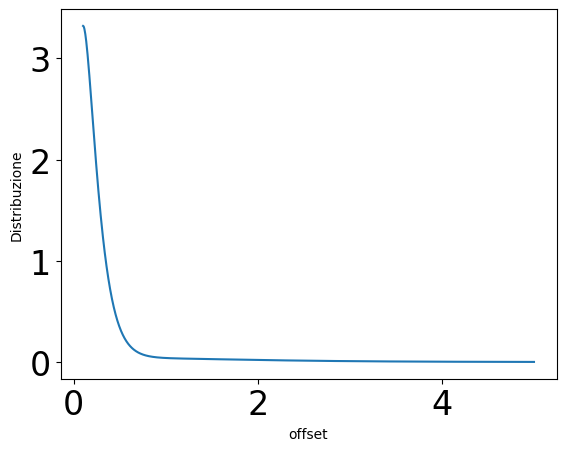

In [118]:
# ModelloS19
# Valori iniziali dei parametri
rho = 0.1
sigma0  = 0.8
sigma1 = 0.1
def modello2 (x, rho, sigma0, sigma1): 
    return rho*(x/sigma0)*(np.exp(-x/sigma0))+(1-rho)*(x/(sigma1)**2)*(np.exp(-x/sigma1))
# Creare un array
x_val1 = np.linspace(0.1,5,1000) 

y_val1 = modello2(x_val1, rho, sigma0, sigma1)

plt.plot(x_val1, y_val1, label = 'modello1')
plt.xlabel('offset')
plt.ylabel('Distribuzione')
plt.show()

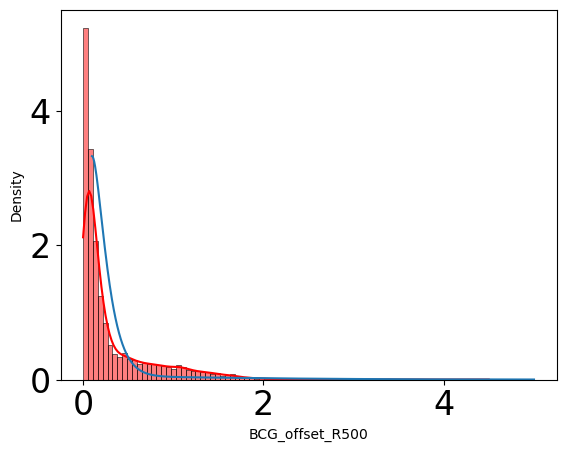

In [120]:
#Grafico con distribuzione dei dati e fit del modello con parametri iniziali
offset = df["BCG_offset_R500"]
sns.histplot(offset, bins=83, kde=True, color='red', stat='density')
plt.plot(x_val1, y_val1, label = 'modello1')

Di seguito viene implementato l'algoritmo ECMEE per il secondo modello. 

In [83]:
# Si definisce la funzione likelihood
def log_likelihood(theta, x_val1):
     rho, sigma0, sigma1 = theta 
     model1 = modello2(x_val1, rho, sigma0, sigma1)
     return np.sum(np.log(model1))


In [85]:
# si definisce la funzione prior 
def log_prior(theta):
    rho, sigma0, sigma1 = theta
    if not (0 <= rho <= 1 and sigma0 > 0 and sigma1 > 0):
        return -np.inf  # per parametri non validi
    
    return 0.0  # Prior uniforme


In [87]:
#si definisce la funzione posterior
def log_posterior(theta, x_val1):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x_val1)

In [90]:
from scipy.optimize import minimize # trova il minimo di una funzione
X = df["BCG_offset_R500"]
nll = lambda *args: -log_posterior(*args) # minimizzare il -log_post equivale a massimizzare la log_post

# Parametri iniziali per l'ottimizzazione
initial = np.array([0.1, 0.6, 0.8]) * (1 + 0.1 * np.random.randn(3))  # piccole fluttuazioni ai parametri iniziali 

# Minimizzazione usando scipy.optimize.minimize
soln = minimize(nll, initial, args=(X))

# Parametri ottimizzati
rho_bf, sigma0_bf, sigma1_bf = soln.x
print(soln.x)

C:\Users\Sara\anaconda3\Lib\site-packages\scipy\optimize\_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\Sara\anaconda3\Lib\site-packages\scipy\optimize\_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


[0.26580257 0.90323064 0.05265   ]


In [92]:
#Si testa la funzione della posterior per alcuni valori dei parametri 
#più è grande la differenza tra le posterior calcolate più il modello è sensibile alla variazione dei parametri
theta = np.array([0.6, 0.9, 0.5]) #parametri iniziali

%time print(log_posterior(theta, x_val1))

%time print(log_likelihood(theta, x_val1))

theta = np.array([0.3, 0.4, 0.2])

%time print(log_posterior(theta, x_val1))

-2202.6347863472847
CPU times: total: 0 ns
Wall time: 999 μs
-2202.6347863472847
CPU times: total: 15.6 ms
Wall time: 1 ms
-5500.363201741873
CPU times: total: 0 ns
Wall time: 0 ns


In [102]:
offset = df["BCG_offset_R500"].values
theta = np.array([0.1, 0.6, 0.8]) #parametri iniziali 
print(theta)
ndim=3 #il numero di parametri da stimare 
nwalkers=12 # il numero di walkers dovrebbe essere ndim*2+1
pos = theta + 0.01 * np.random.randn(nwalkers, ndim) # si definisce la posizione iniziale

sampler_2 = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args= [offset])

sampler_2.run_mcmc(pos, 3000, progress=True); #posizione, nstep 

[0.1 0.6 0.8]


100%|█████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:11<00:00, 254.88it/s]


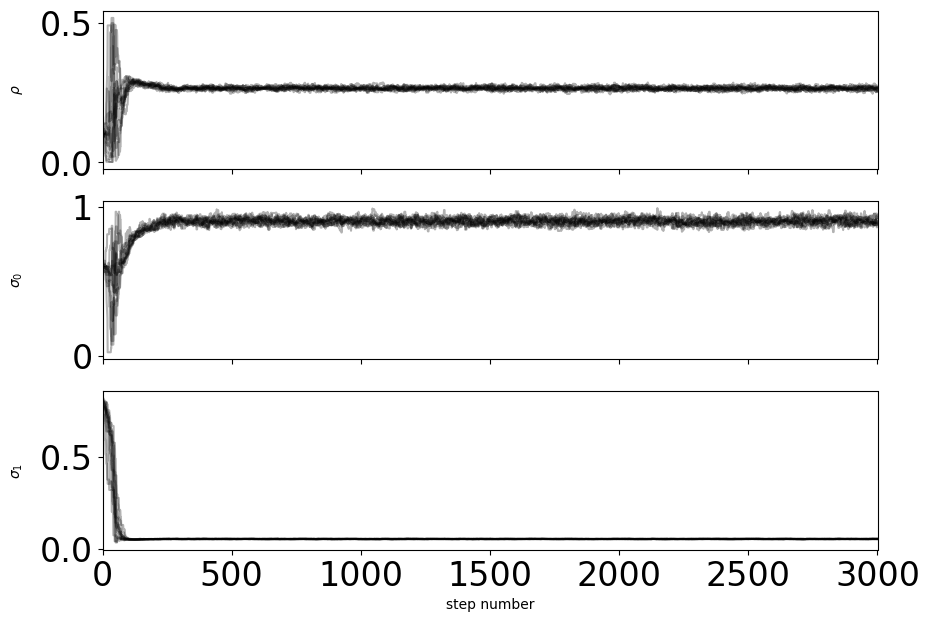

In [96]:
samples_2 = sampler_2.get_chain()
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
labels = [r"$\rho$", r"$\sigma_{0}$", r"$\sigma_{1}$"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples_2[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples_2))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [ ]:
tau = sampler_1.get_autocorr_time() #per vedere a quali passi cominciano ad autocorrelarsi i parametri
print(tau)

In [98]:
import getdist
from getdist import plots, MCSamples
import matplotlib

(16200, 3)
Removed no burn in


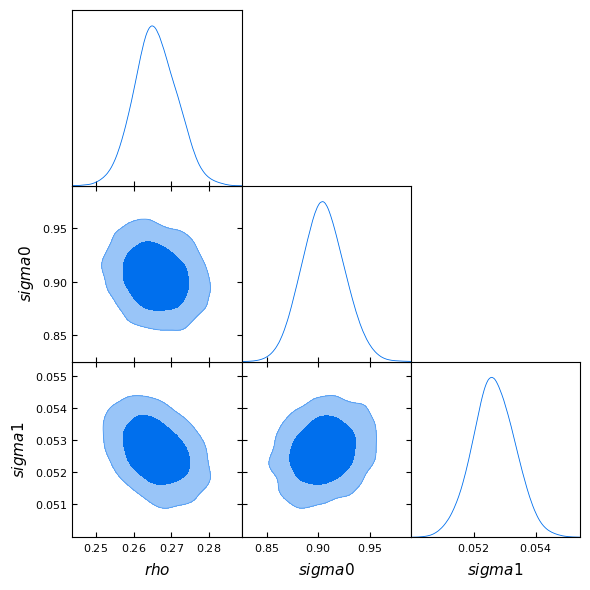

In [100]:
emcee_sample_2 = sampler_2.get_chain(discard=300, thin=2, flat=True) 

print(emcee_sample_2.shape)

labels=["rho","sigma0","sigma1"]
names=["rho","s0","s1"]

samples_2 = MCSamples(samples=emcee_sample_2,names = names, labels = labels)

#Triangle plot
g = plots.getSubplotPlotter()

matplotlib.rc('xtick',labelsize=24)
matplotlib.rc('ytick',labelsize=24)

g.triangle_plot(samples_2, filled=True)

### Valori di Best-fit

In [104]:
means=np.zeros(ndim)
best_fits=np.zeros(ndim)

log_like= sampler_2.get_log_prob(discard=300, thin=2, flat=True) # il valore della log_like per ogni campione 

for i in range(len(names)):
    print(samples_2.getInlineLatex(names[i],limit=1))
    stats  =samples_2.getMargeStats()  
    means[i] = stats.parWithName(names[i]).mean
    best_fits[i]=emcee_sample_2[np.argwhere(log_like==np.amax(log_like)),i]
    print(labels[i],'mean=',means[i],'best fit =',best_fits[i])    

rho = 0.2658\pm 0.0058
rho mean= 0.26583329622096835 best fit = 0.2665033933443754
sigma0 = 0.905\pm 0.021
sigma0 mean= 0.9046079342350134 best fit = 0.8985512394125676
sigma1 = 0.05265\pm 0.00070
sigma1 mean= 0.0526530032074914 best fit = 0.05222271234889351


C:\Users\Sara\AppData\Local\Temp\ipykernel_16248\3652336673.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  best_fits[i]=emcee_sample_2[np.argwhere(log_like==np.amax(log_like)),i]


## Bontà del fit

Di seguito viene riproposta per il secondo modello la valutazione della bontà del fit e il test d'ipotesi.

Text(0, 0.5, 'Residui')

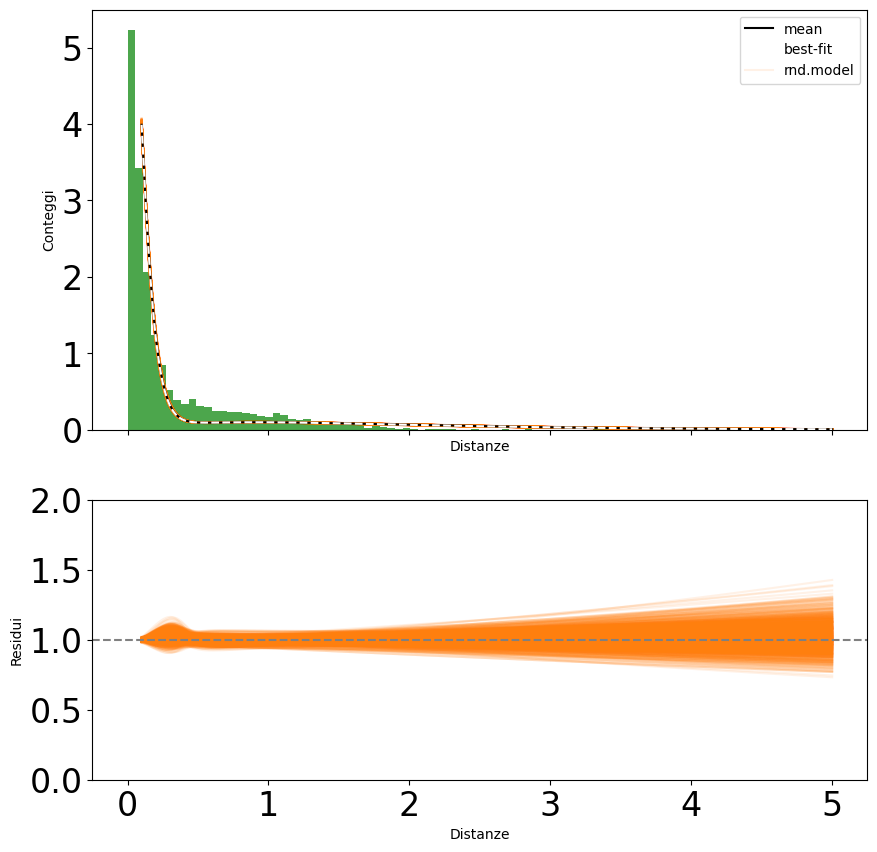

In [106]:
x = np.linspace(0.1,5,1000)

fig, ax = plt.subplots(2, figsize=(10, 10), sharex=True, gridspec_kw = {'height_ratios':[3,2]})
ax[0].hist(df['BCG_offset_R500'], bins=83, color='green', alpha=0.7, density=True)

# Mean model 
rho, sigma0, sigma1 = means 
y_val_giust1 = modello2(x, rho, sigma0, sigma1)
ax[0].plot(x, y_val_giust1, c="k",zorder=10,label='mean')

# Best-fit model
rho, sigma0, sigma1 = best_fits
y_val_giust1 = modello2(x, rho, sigma0, sigma1)
ax[0].plot(x, y_val_giust1, c="w",ls='--',zorder=11,label='best-fit')

N=1000 # numero di campioni estratti
inds = np.random.randint(len(emcee_sample_2), size=N) 
for ind in inds: #fai un loop 
    rho, sigma0, sigma1 = emcee_sample_2[ind] # si definisce un valore di rho, sima0 e sigma1
    y_val1 = modello2(x, rho, sigma0, sigma1)
    if ind==inds[0]:
        ax[0].plot(x, y_val1, "C1", alpha=0.1, label='rnd.model')
    else:
         ax[0].plot(x, y_val1, "C1", alpha=0.1)
    ax[1].plot(x, y_val1/y_val_giust1, "C1", alpha=0.1) #residui modello campionato-modello medio 


ax[0].set_xlabel('Distanze')
ax[0].set_ylabel('Conteggi')
ax[0].legend()


ax[1].set_ylim(0,2)
ax[1].set_xlabel('Distanze')
ax[1].axhline(1.,ls='--',c='gray')
ax[1].set_ylabel('Residui')


Anche in questo caso si notano che i residui sulle code si discostano maggiormente da 1.

### Test d'ipotesi

gradi= 41
gradi= 41
Chi_sq best-fit = 2165.32
critical value (alpha=0.05): 56.94238714682408
Reduced Chi_sq best-fit = 52.81


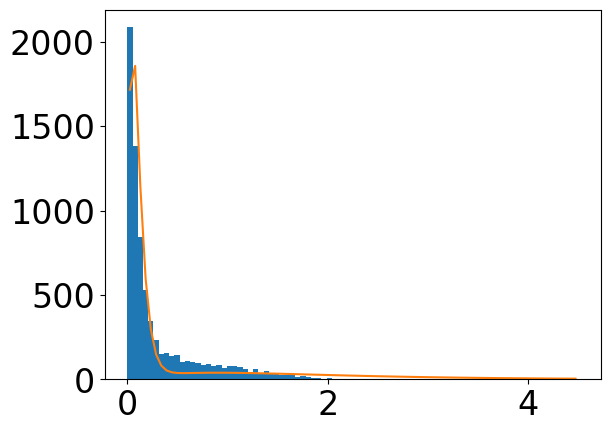

In [108]:
n_bins = 86
x_values= df['BCG_offset_R500']
y,x,_=plt.hist(x_values, bins=n_bins)
xcentro=(x[1:]+x[:-1])/2
dx=x[1:]-x[:-1]

def testipotesi(y,x,par):
    rho, sigma0, sigma1 = par
    model = modello2(xcentro, rho, sigma0, sigma1)*dx 
    mu = len(x_values)*model
    filtro = mu > 20
    s = np.sum(((y - mu)**2/mu)[filtro])
    gradi = len(mu[filtro]) - 4  #1 di default perche lo fa l'istogramma e due in piu perche sono due parametri
    print('gradi=',gradi)
    return s,mu 
    
s,mu = testipotesi(y,xcentro,best_fits) 
filtro = mu > 20
gradi = len(mu[filtro]) - 4 
plt.plot(xcentro, mu)
print('gradi=',gradi)
reduced_chisq=s/gradi
print('Chi_sq best-fit =',np.round(s,2))
alpha=0.05 # livello di confidenza 
print('critical value (alpha=0.05):',chi2.ppf(1 - alpha, gradi))
print('Reduced Chi_sq best-fit =',np.round(reduced_chisq,2))



Anche per il secondo modello il $t>> t_{\alpha}$ e il $\chi_{red}^2>>1$ e quindi il test non può essere considerato superato. 

## Conclusioni 

Concludendo si può dire che i due modelli sembrano fittare abbastanza bene l'andamento dei dati, anche se con alcune discrepanze dovute presumibilmente a:
- all'efficienza del metodo utilizzato
- all'implementazione del codice
- alla stima corretta o meno dei parametri
- alla maggiore incertezza nelle code
- ed eventualmente al modello stesso proposto.